# 五王之战分析 - 冰与火之歌

## 简介

五王之战（War of the Five Kings）是著名严肃奇幻小说《冰与火之歌》中的著名内战。这是一场规模空前、波及七大王国的内乱。顾名思义，前后共有五人在战争中称王：乔佛里、史坦尼斯、蓝礼均声称自己是铁王座的合法继承人。除此之外，罗柏·史塔克被北境众封臣推选为北境之王，巴隆·葛雷乔伊亦再度掀起独立大旗，欲摆脱铁王座的统治，自称为铁群岛之王。



本数据集(battles.csv)包含了五王之战期间的战争，它是所有战斗的大集合。该数据是Kaggle中[Game of Thrones](https://www.kaggle.com/mylesoneill/game-of-thrones)的一部分。

数据中的变量含义解释：
```
name: 战争的名称，字符变量。
year: 战争发生的年份，数值变量。
battle_number: 本数据中的unique id，对应每一场独立的战役，数值变量。
attacker_king: 攻击方的国王，"/"表示了国王的更换。例如："Joffrey/Tommen Baratheon"意味着Tomen Baratheon继承了Joffrey的王位，分类变量。
defender_king: 防守方的国王，分类变量。
attacker_1: 攻击方将领，字符变量。
attacker_2: 攻击方将领，字符变量。
attacker_3: 攻击方将领，字符变量。
attacker_4: 攻击方将领，字符变量。
defender_1: 防守方将领，字符变量。
defender_2: 防守方将领，字符变量。
defender_3: 防守方将领，字符变量。
defender_4: 防守方将领，字符变量。
attacker_outcome: 从攻击方角度来看的战争结果，分别有：win, loss, draw，分类变量。
battle_type: 战争的类别。pitched_battle: 双方军队在一个地点相遇并战斗，这也是最基本的战争类别；ambush: 以隐身或诡计为主要攻击手段的战争；siege: 阵地战；razing: 对未设防位置的攻击。分类变量。
major_death: 是否有重要人物的死亡，二进制变量。
major_capture: 是否有重要人物的被捕，二进制变量。
attacker_size: 攻击方力量的大小，并未对骑兵、步兵等士兵种类有所区分，数值变量。
defender_size: 防守方力量的大小，并未对骑兵、步兵等士兵种类有所区分，数值变量。
attacker_commander: 攻击方的主要指挥官。指挥官的名字中并没有包含头衔，不同的指挥官名字用逗号隔开，字符变量。
defender_commander: 防守方的主要指挥官。指挥官的名字中并没有包含头衔，不同的指挥官名字用逗号隔开，字符变量。
summer: 战争是否发生于夏天，二进制变量。
location: 战争发生的地点，字符变量。
region: 战争发生的地域，包括：Beyond the Wall, The North, The Iron Islands, The Riverlands, The Vale of Arryn, The Westerlands, The Crownlands, The Reach, The Stormlands, Dorne，分类变量。
note: 注释，字符变量。

```

## 提出问题

1.哪个国王获得胜利最多？  

2.攻击力量的大小和防御力量的大小有什么样的关系？  

3.攻、防力量的大小对战争胜利的影响是怎样的？


在提出了问题之后，我们将开始导入数据，并对数据进行探索性分析，来回答上面提出的问题。


## 数据评估和清理

In [1]:
# 请先运行此代码块，以确保在可视化中可以显示中文
!rm -rf ~/.cache/matplotlib/fontList.json
!wget http://d.xiazaiziti.com/en_fonts/fonts/s/SimHei.ttf -O /opt/conda/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
import matplotlib.pyplot as plt 

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

--2018-12-10 14:58:34--  http://d.xiazaiziti.com/en_fonts/fonts/s/SimHei.ttf
Resolving d.xiazaiziti.com (d.xiazaiziti.com)... 67.198.189.58
Connecting to d.xiazaiziti.com (d.xiazaiziti.com)|67.198.189.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050868 (9.6M) [application/octet-stream]
Saving to: ‘/opt/conda/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’

/opt/conda/lib/pyth 100%[===================>]   9.58M  4.46MB/s    in 2.1s    

2018-12-10 14:58:36 (4.46 MB/s) - ‘/opt/conda/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’ saved [10050868/10050868]



In [2]:
# TO DO: load pacakges
import pandas as pd
import numpy as np
% matplotlib inline

In [3]:
# TO DO: load the dataset
df = pd.read_csv('battles.csv')
df.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [4]:
# TO DO: check the dataset general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
name                  38 non-null object
year                  38 non-null int64
battle_number         38 non-null int64
attacker_king         36 non-null object
defender_king         35 non-null object
attacker_1            38 non-null object
attacker_2            10 non-null object
attacker_3            3 non-null object
attacker_4            2 non-null object
defender_1            37 non-null object
defender_2            2 non-null object
defender_3            0 non-null float64
defender_4            0 non-null float64
attacker_outcome      37 non-null object
battle_type           37 non-null object
major_death           37 non-null float64
major_capture         37 non-null float64
attacker_size         24 non-null float64
defender_size         19 non-null float64
attacker_commander    37 non-null object
defender_commander    28 non-null object
summer                37 non-null flo

In [5]:
# TO DO: clean the data (optional: only there are problems)
df.drop(['attacker_2','attacker_3','attacker_4','defender_2','defender_3','defender_4','summer','location','note'], axis=1, inplace=True)


In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 16 columns):
name                  38 non-null object
year                  38 non-null int64
battle_number         38 non-null int64
attacker_king         36 non-null object
defender_king         35 non-null object
attacker_1            38 non-null object
defender_1            37 non-null object
attacker_outcome      37 non-null object
battle_type           37 non-null object
major_death           37 non-null float64
major_capture         37 non-null float64
attacker_size         24 non-null float64
defender_size         19 non-null float64
attacker_commander    37 non-null object
defender_commander    28 non-null object
region                38 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 4.8+ KB


In [8]:
df['attacker_outcome'].unique()

array(['win', 'loss', nan], dtype=object)

In [9]:
#将df['attacker_outcome']列的分类变量改为虚拟变量
df[['loss','win']] = pd.get_dummies(df['attacker_outcome'])

In [10]:
df

,name,year,battle_number,attacker_king,defender_king,attacker_1,defender_1,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,region,loss,win
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Tully,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",The Westerlands,0,1
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Baratheon,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,The Riverlands,0,1
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Tully,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",The Riverlands,0,1
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,Lannister,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",The Riverlands,1,0
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Lannister,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,The Riverlands,0,1
5,Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Baratheon,Stark,Lannister,win,ambush,0.0,0.0,6000.0,12625.0,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",The Riverlands,0,1
6,Sack of Darry,298,7,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Darry,win,pitched battle,0.0,0.0,NaN,NaN,Gregor Clegane,Lyman Darry,The Riverlands,0,1
7,Battle of Moat Cailin,299,8,Balon/Euron Greyjoy,Robb Stark,Greyjoy,Stark,win,pitched battle,0.0,0.0,NaN,NaN,Victarion Greyjoy,NaN,The North,0,1
8,Battle of Deepwood Motte,299,9,Balon/Euron Greyjoy,Robb Stark,Greyjoy,Stark,win,siege,0.0,0.0,1000.0,NaN,Asha Greyjoy,NaN,The North,0,1
9,Battle of the Stony Shore,299,10,Balon/Euron Greyjoy,Robb Stark,Greyjoy,Stark,win,ambush,0.0,0.0,264.0,NaN,Theon Greyjoy,NaN,The North,0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 18 columns):
name                  38 non-null object
year                  38 non-null int64
battle_number         38 non-null int64
attacker_king         36 non-null object
defender_king         35 non-null object
attacker_1            38 non-null object
defender_1            37 non-null object
attacker_outcome      37 non-null object
battle_type           37 non-null object
major_death           37 non-null float64
major_capture         37 non-null float64
attacker_size         24 non-null float64
defender_size         19 non-null float64
attacker_commander    37 non-null object
defender_commander    28 non-null object
region                38 non-null object
loss                  38 non-null uint8
win                   38 non-null uint8
dtypes: float64(4), int64(2), object(10), uint8(2)
memory usage: 4.9+ KB


## 数据探索分析

#### 问题1.哪个国王获得胜利最多？      

In [12]:
#提取attacker_king胜利的数据集
a_king = df[df['win']==1]

In [13]:
#以attacker_king的名字分组，统计胜利的次数
k1 = a_king.groupby(['attacker_king'], as_index=False)['battle_number'].count()
k1

,attacker_king,battle_number
0,Balon/Euron Greyjoy,7
1,Joffrey/Tommen Baratheon,13
2,Robb Stark,8
3,Stannis Baratheon,2


In [14]:
#重命名attacker_king列名
k1 = k1.rename(columns={'attacker_king':'king','battle_number':'win_count'})
k1

,king,win_count
0,Balon/Euron Greyjoy,7
1,Joffrey/Tommen Baratheon,13
2,Robb Stark,8
3,Stannis Baratheon,2


In [15]:
#提取defender_king胜利的数据集
d_king = df[df['loss']==1]

In [16]:
#以defender_king的名字分组，统计胜利次数
k2 = d_king.groupby(['defender_king'], as_index=False)['battle_number'].count()
k2

,defender_king,battle_number
0,Joffrey/Tommen Baratheon,3
1,Mance Rayder,1
2,Robb Stark,1


In [17]:
#重命名defender_king列名
k2 = k2.rename(columns={'defender_king':'king','battle_number':'win_count'})
k2

,king,win_count
0,Joffrey/Tommen Baratheon,3
1,Mance Rayder,1
2,Robb Stark,1


In [18]:
k = pd.merge(k1,k2,how='outer',on=['king'])
k

,king,win_count_x,win_count_y
0,Balon/Euron Greyjoy,7.0,NaN
1,Joffrey/Tommen Baratheon,13.0,3.0
2,Robb Stark,8.0,1.0
3,Stannis Baratheon,2.0,NaN
4,Mance Rayder,NaN,1.0


In [19]:
k.fillna(0,inplace=True)
k

,king,win_count_x,win_count_y
0,Balon/Euron Greyjoy,7.0,0.0
1,Joffrey/Tommen Baratheon,13.0,3.0
2,Robb Stark,8.0,1.0
3,Stannis Baratheon,2.0,0.0
4,Mance Rayder,0.0,1.0


In [20]:
k['win'] = k['win_count_x'] + k['win_count_y']
k

,king,win_count_x,win_count_y,win
0,Balon/Euron Greyjoy,7.0,0.0,7.0
1,Joffrey/Tommen Baratheon,13.0,3.0,16.0
2,Robb Stark,8.0,1.0,9.0
3,Stannis Baratheon,2.0,0.0,2.0
4,Mance Rayder,0.0,1.0,1.0


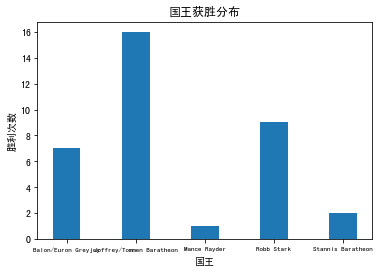

In [21]:
plt.bar(k['king'],k['win'],width=0.4)
plt.title('国王获胜分布')
plt.xlabel('国王')
plt.ylabel('胜利次数')
plt.xticks(fontsize=7);

问题1.从柱状图的分布开看，获胜次数最多的国王为Joffrey/Tommen Baratheon，最少为Mance Rayder。      

#### 问题2.攻击力量的大小和防御力量的大小有什么样的关系？

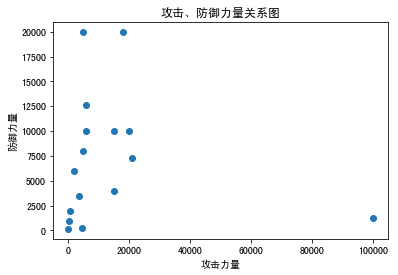

In [22]:
#绘制 attacker_size和 defender_size 点阵图
plt.scatter(x=df['attacker_size'],y=df['defender_size'])
plt.xlabel('攻击力量')
plt.ylabel('防御力量')
plt.title('攻击、防御力量关系图');

问题2.从上面点阵图的分布情况来看，攻击力量大小与防御力量大小没有明显的线性关系，所以这两个变量间不存在明显的线性关系。

####  问题3.攻、防力量的大小对战争胜利的影响是怎样的？

In [23]:
#提取 attacker_size 和 win 列信息
col = ['attacker_size','win']
df_a = pd.DataFrame(df,columns=col)
df_a.dropna(axis=0,inplace=True)
df_a

,attacker_size,win
0,15000.0,1
2,15000.0,1
3,18000.0,0
4,1875.0,1
5,6000.0,1
8,1000.0,1
9,264.0,1
10,244.0,1
11,20.0,1
13,618.0,1


In [24]:
#使用逻辑回归分析
import statsmodels.api as sm
df_a['intercept'] = 1
logit_mod = sm.Logit(df_a['win'],df_a[['intercept','attacker_size']])
results = logit_mod.fit()
results.summary()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: inf
         Iterations 7


/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    win   No. Observations:                   24
Model:                          Logit   Df Residuals:                       22
Method:                           MLE   Df Model:                            1
Date:                Mon, 10 Dec 2018   Pseudo R-squ.:                    -inf
Time:                        14:58:41   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                       -5.1783
                                        LLR p-value:                     1.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept         2.9495      1.030      2.863      0.004       0.930       4.968
attacker_size    -0.0002   8.79e-05     -2.368      0.018      -0.000   -3.59e-05
=================================================================================
"""

In [25]:
np.exp(-0.0002)

0.99980001999866674

In [26]:
#提取 defender_size 和 loss 列信息
col = ['defender_size','loss']
df_d = pd.DataFrame(df,columns=col)
df_d.dropna(axis=0,inplace=True)
df_d

,defender_size,loss
0,4000.0,0
1,120.0,0
2,10000.0,0
3,20000.0,1
4,6000.0,0
5,12625.0,0
10,900.0,0
13,2000.0,0
14,10000.0,0
15,20000.0,0


In [27]:
df_d['intercept'] = 1
logit_mod = sm.Logit(df_d['loss'],df_d[['intercept','defender_size']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 304.727340
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   loss   No. Observations:                   19
Model:                          Logit   Df Residuals:                       17
Method:                           MLE   Df Model:                            1
Date:                Mon, 10 Dec 2018   Pseudo R-squ.:                 -0.1438
Time:                        14:58:41   Log-Likelihood:                -5789.8
converged:                       True   LL-Null:                       -5061.9
                                        LLR p-value:                     1.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        -2.0805      0.951     -2.187      0.029      -3.945      -0.216
defender_size     0.0001   8.99e-05      1.133      0.257   -7.44e-05       0.000
=================================================================================
"""

In [28]:
np.exp(0.0001)

1.0001000050001667

问题3. 从逻辑回归分析的结果来看，attacker_size 每增加一倍，attacker方获胜的机会增加0.9998；defender_size 每增加一倍，defender 方获胜的机会增加1.0001倍。defender 方增加力量大小会比 attacker 方有微弱优势。

## 得出结论

问题1.从柱状图的分布开看，获胜次数最多的国王为Joffrey/Tommen Baratheon，最少为Mance Rayder。    

问题2.从上面点阵图的分布情况来看，攻击力量大小与防御力量大小没有明显的线性关系，所以这两个变量间不存在明显的线性关系。

问题3. 从逻辑回归分析的结果来看，attacker_size 每增加一倍，attacker方获胜的机会增加0.9998；defender_size 每增加一倍，defender 方获胜的机会增加1.0001倍。defender 方增加力量大小会比 attacker 方有微弱优势。

## 反思

因为 attacker_outcome 有一个缺失值，问题1的柱状图并不是完整的，而attacker_size 和 defender_size 的列都有数据缺失，所以问题2的点阵图无法显示所有战役的攻击、防御力量的点，所以并不能确定attacker_size 和 defender_size一定不存在线性关系，问题3的回归分析也同样因为数据缺失，会影响分析结果的准确性。

> 若想与他人分享我们的分析结果，除了向他们提供 jupyter Notebook (.ipynb) 文件的副本外，我们还可以将 Notebook 输出导出为一种甚至那些未安装 Python 的人都能打开的形式。从左上方的“文件”菜单，前往“下载为”子菜单。然后你可以选择一个可以更普遍查看的格式，例如 HTML (.html) 。你可能需要额外软件包或软件来执行这些导出。